## Шаг №1. Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flights_september = pd.read_csv('query_1.csv')

In [4]:
city_august = pd.read_csv('query_3.csv')

In [5]:
flights_september.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Посмотрим на формат данных и информацию в них

In [6]:
flights_september.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


С форматом данных все в порядке и пропусков нет, поэтому переходим к следующей таблице.

In [7]:
city_august.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Теперь здесь ознакомимся с форматом даных.

In [8]:
city_august.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Здесь тоже все хорошо и без пропусков. Формат данных соотвутствует требованиям. 

### Вывод:

Можем сделать вывод, что данные готовы к дальнейшему анализу - типы верны и пропусков нет.

## Шаг № 2. Предобработка данных

Теперь выберем Топ10 городов по количеству рейсов и отсортируем среднее количество рейсов по убыванию

In [9]:
city_august['average_flights'] = city_august['average_flights'].sort_values(ascending = False)

In [10]:
city_august = city_august.sort_values(['average_flights'], ascending = False)

In [11]:
city_august.head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Теперь получим из них вырезку именно ТОП10 с верными индексами

In [12]:
top10 = city_august.query('average_flights >= 9.580645').reset_index()

In [13]:
top10 = top10.drop('index', 1)

In [14]:
top10.head(10)

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


### Вывод: 

Мы подготовили таблицы к следующему этапу.

## Шаг № 3. Исследовательский анализ данных

Отсортируем значения по убыванию и построим гисторамму Количества рейсов в сентябре 2018 года по моделям самолетов.

In [15]:
flights_september = flights_september.sort_values(by = 'flights_amount')

[Text(0, 0.5, 'Модели самолета'),
 Text(0.5, 0, 'Количество рейсов'),
 Text(0.5, 1.0, 'Количество рейсов в сентябре 2018 года по моделям самолетов')]

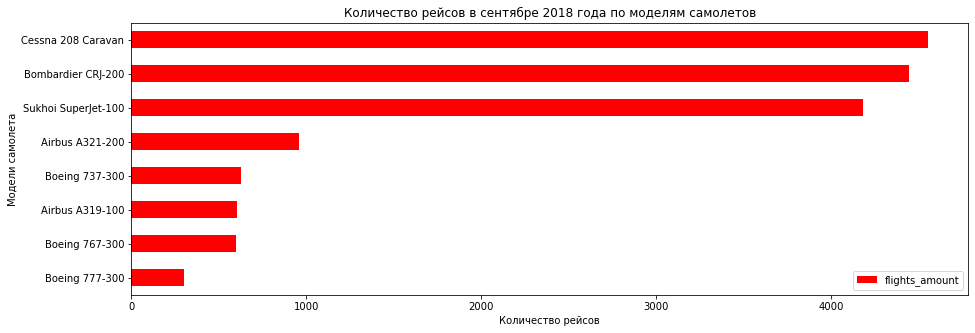

In [16]:
flights_september.plot.barh('model',legend=True, facecolor='red',align='center',figsize=(15,5)).set(title='Количество рейсов в сентябре 2018 года по моделям самолетов', xlabel="Количество рейсов", ylabel="Модели самолета")


Как мы можем заметить, чаще всего в сентябре 2018 года летали самолеты моделей: Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi Superjet. Это наводит на мысль, что почему-то популярные модели от Айробусов и Боингов не особо были активны, хотя обычно рейсы этих самолетов чаще всего используют при полетах. 

Построим график для всех городов. Поскольку их очень много, и результат будет не очевиден, то все поделим на 3 части.

Определим среднее количество рейсов для первой трети

In [17]:
city_august['average_flights'].quantile(0.33)

2.161290322580645

Определим среднее количество рейсов для второй трети

In [18]:
city_august['average_flights'].quantile(0.63)

4.0

Выведем отдельно каждую часть для анализа исходя из полученных данных

In [19]:
city_august_low = city_august.query('average_flights <=2')
city_august_medium = city_august.query('average_flights > 2 and average_flights <=4')
city_august_high = city_august.query('average_flights >4')

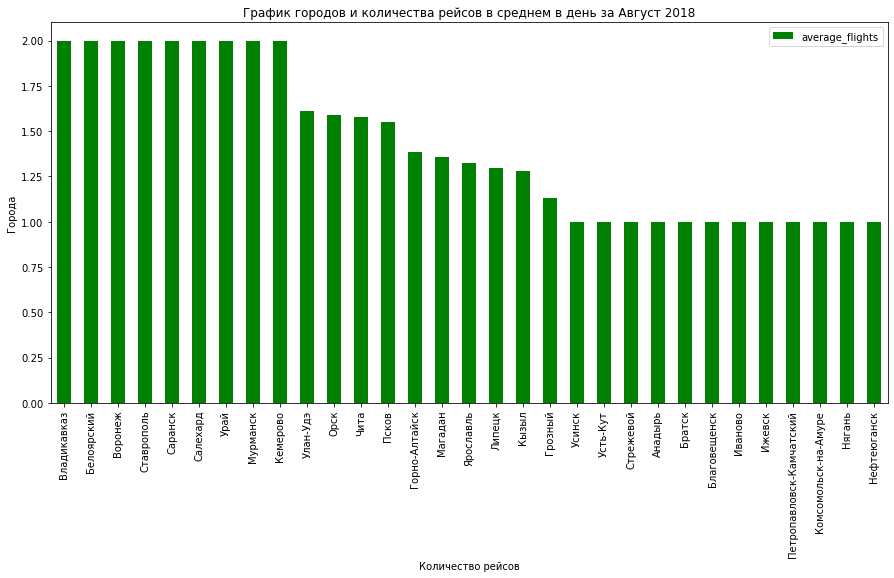

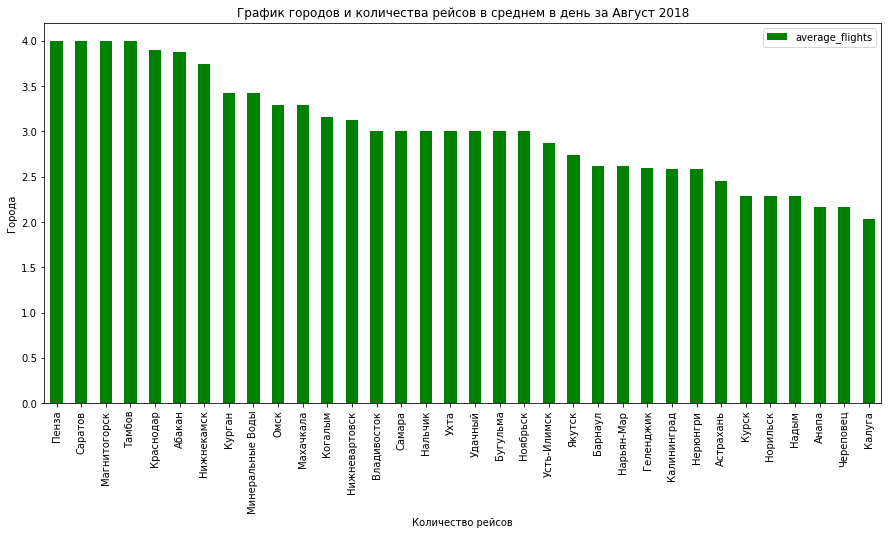

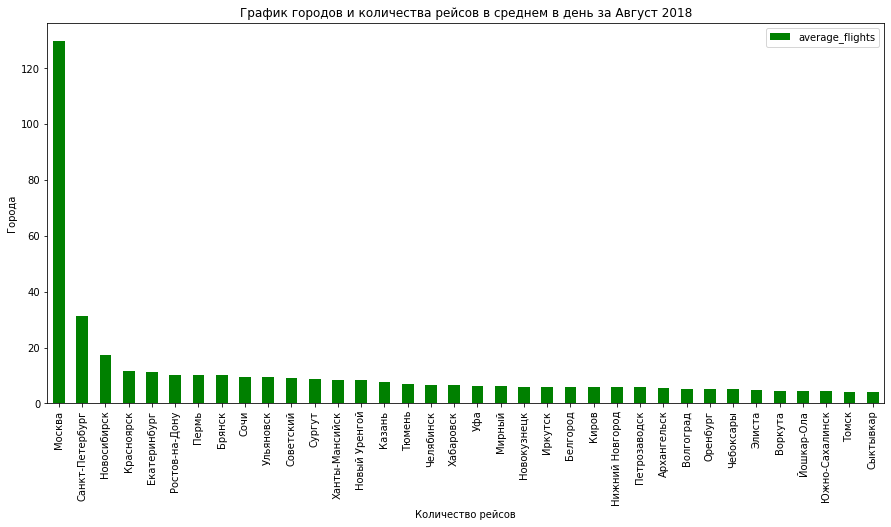

In [20]:
for element in [city_august_low, city_august_medium, city_august_high]:
    element.plot.bar('city',legend=True, facecolor='green',align='center',figsize=(15,7)).set(title='График городов и количества рейсов в среднем в день за Август 2018', xlabel="Количество рейсов", ylabel="Города")

Мы посмотрели на все города в разрезе трех графиков. Откровенно, не сказал бы, что наличие в городах Крупных Музыкальных фестивалей влияет на спрос в августе. 

[Text(0, 0.5, 'Города'),
 Text(0.5, 0, 'Количество рейсов'),
 Text(0.5, 1.0, 'Топ-10 городов и количество рейсов в среднем в день за Август 2018')]

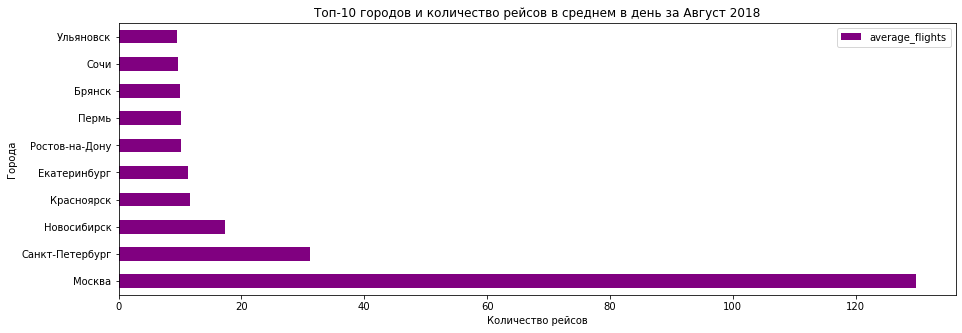

In [21]:
top10.plot.barh('city',legend=True, facecolor='purple',align='center',figsize=(15,5)).set(title='Топ-10 городов и количество рейсов в среднем в день за Август 2018', xlabel="Количество рейсов", ylabel="Города")


Здесь все очевидно, Москва и Питер в день принимают больше всего рейсов. Первые 6-7 городов в этом списке можно описать тем, что это миллионники и крупнейшие города России, поэтому большое количество рейсов - это вполне нормально. Сочи - тоже объяснимо - город-куррорт. Вот наличие в Топе Ульяновская и Брянска действительно удивляет. В этих городах не было крупных фестивалей, да и города достаточно небольшие. Вполне возможно что были какие-то акции на билеты со стороны компании. 

### Итоговый вывод: 

Нельзя делать вывод, что наличие в городе крупных фестивалей влияет на спрос пользователей. В основном, пользуются спросом среди клиентов города миллионники. В результате анализа у нас не хватало данных, чтобы отвергнуть или не отвергать гипотезу о том, что спрос на направления, где проходят фестивали, увеличивается. Может только предположить, что он почти не изменился.

Город Москва принимает самое большое количество рейсов. Самым используемым самолетом оказался Cessna 208 Caravan.